In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Configuração da Conexão (Assume que o .env foi lido pelo Docker)
DB_USER = os.getenv('POSTGRES_USER')
DB_PASSWORD = os.getenv('POSTGRES_PASSWORD')
DB_NAME = os.getenv('POSTGRES_DB')
DB_HOST = os.getenv('POSTGRES_HOST') 
DB_PORT = os.getenv('POSTGRES_PORT')

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(DATABASE_URL)

print("Conexão com PostgreSQL estabelecida.")

Conexão com PostgreSQL estabelecida.


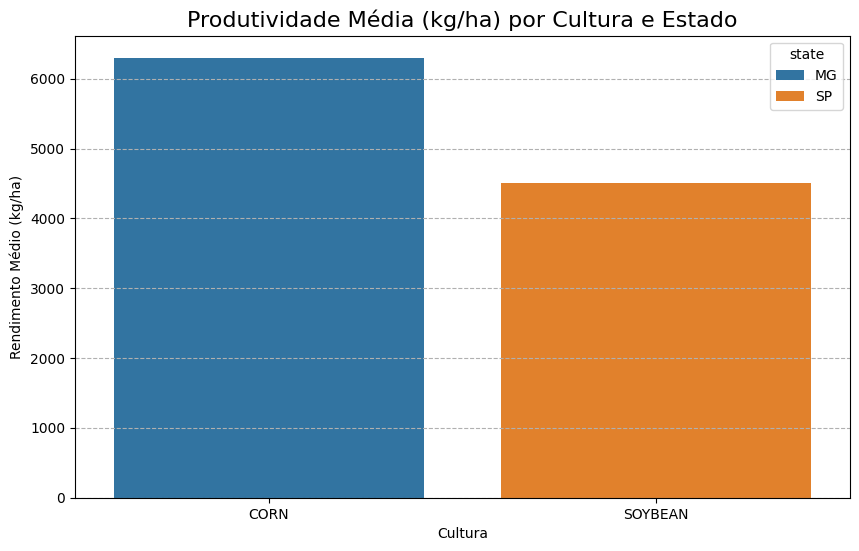

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta SQL de Agregação
query_analysis = """
SELECT 
    crop, 
    state, 
    AVG(yield_kg_ha) AS avg_yield
FROM 
    yield_records
GROUP BY 
    crop, 
    state
ORDER BY 
    avg_yield DESC;
"""

df_analysis = pd.read_sql(query_analysis, engine)

# Criação do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='crop', y='avg_yield', hue='state', data=df_analysis)
plt.title('Produtividade Média (kg/ha) por Cultura e Estado', fontsize=16)
plt.xlabel('Cultura')
plt.ylabel('Rendimento Médio (kg/ha)')
plt.grid(axis='y', linestyle='--')
plt.show()

In [7]:
query_weather = """
SELECT 
    city, 
    current_temp_c, 
    humidity_percent, 
    extraction_date
FROM 
    current_weather_data
ORDER BY 
    extraction_date DESC;
"""
df_weather = pd.read_sql(query_weather, engine)

print("Dados climáticos coletados da API")
print(df_weather)

# Confirmação do tipo de dado
print("\nTipos de dados do Clima:")
print(df_weather.dtypes)

Dados climáticos coletados da API
                 city  current_temp_c  humidity_percent  \
0   Rio Grande do Sul           17.09                82   
1        Minas Gerais           24.20                40   
2           Sao Paulo           20.62                87   
3   Rio Grande do Sul           18.91                92   
4        Minas Gerais           23.35                39   
5           Sao Paulo           23.03                76   
6   Rio Grande do Sul           18.91                92   
7        Minas Gerais           23.35                39   
8           Sao Paulo           23.03                76   
9   Rio Grande do Sul           19.19                93   
10       Minas Gerais           24.60                32   
11          Sao Paulo           24.47                70   
12  Rio Grande do Sul           19.19                93   
13       Minas Gerais           24.60                32   
14          Sao Paulo           24.47                70   

              extract

In [1]:
# Célula de Verificação de Dados
check_query = """
SELECT * FROM yield_records;
"""
df_check = pd.read_sql(check_query, engine)

print("--- Verificação da Tabela yield_records ---")
print(f"Total de Registros Encontrados: {len(df_check)}")
print(df_check.head())

NameError: name 'pd' is not defined

In [4]:
query_yield = """
SELECT 
    crop, 
    year, 
    state, 
    yield_kg_ha, 
    avg_temp_c_historical
FROM 
    yield_records;
"""
df_yield = pd.read_sql(query_yield, engine)

print(" Dados Históricos de Rendimento (csv)")
print(df_yield)

--- Dados Históricos de Rendimento (CSV) ---
      crop  year state  yield_kg_ha  avg_temp_c_historical
0  SOYBEAN  2023    SP       4500.5                   23.5
1     CORN  2024    MG       6300.1                   25.5
2  SOYBEAN  2023    SP       4500.5                   23.5
3     CORN  2024    MG       6300.1                   25.5
4  SOYBEAN  2023    SP       4500.5                   23.5
5     CORN  2024    MG       6300.1                   25.5
6  SOYBEAN  2023    SP       4500.5                   23.5
7     CORN  2024    MG       6300.1                   25.5
8  SOYBEAN  2023    SP       4500.5                   23.5
9     CORN  2024    MG       6300.1                   25.5
